### Exploring the Top 1000 Universities in the World: Analysis and Insights

<div style="text-align: center;">
  <img src="images.jpg" alt="Top 1000 Universities" />
</div>

<div class ="alert alert-block alert-info">
This Kaggle notebook delves into the analysis of data pertaining to the top 1000 universities globally.<br/>
  This dataset encompasses information on university rankings, locations, performance indicators, and other relevant metrics.   
</div>


### Import libraries 
<div class ="alert alert-block alert-info">
First, we add the libraries that we need to work with the dataset and analysis.    
</div>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import warnings
import random
warnings.simplefilter('ignore')
from plotly.subplots import make_subplots

### Dataset
<div class ="alert alert-block alert-info">
Reading the dataset and pouring it into the variable
</div>



In [2]:
data = pd.read_csv('eighteen-nineteen-university-datasetseighteen_nineteen_university_datasets.csv',encoding ='unicode_escape')
DF = pd.DataFrame(data)
DF.head()

World Rank                            Institution        Location  \
0           1                     Harvard University             USA   
1           2                    Stanford University             USA   
2           3  Massachusetts Institute of Technology             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   

   National Rank Quality of Education Alumni Employment Quality of Faculty  \
0              1                    2                 1                  1   
1              2                   10                 3                  2   
2              3                    3                11                  3   
3              1                    5                19                  6   
4              2                    9                25                 10   

  Research Output Quality Publications Influence Citations  Score  
0               1                    1         1         1  100.0  
1              10                    4         3         2   96.7  
2              30                   15         2         6   95.1  
3              12                    8         6        19   94.0  
4               9                    5         7         4   93.2

In [3]:
DF.describe()

World Rank  National Rank        Score
count  1000.000000     1000.00000  1000.000000
mean    500.500000       40.02300    75.034300
std     288.819436       49.22871     4.670858
min       1.000000        1.00000    69.800000
25%     250.750000        6.00000    71.500000
50%     500.500000       21.00000    73.750000
75%     750.250000       51.00000    77.300000
max    1000.000000      213.00000   100.000000

### Missing Value
<div class ="alert alert-block alert-info">

Checking for Missing Values 
</div>



In [4]:
DF.isnull().sum()
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


### Duplicate
<div class ="alert alert-block alert-info">

Checking for Duplicate Values 
</div>



In [5]:

if DF.duplicated().sum() > 0:
    print("There are duplicate rows in your data.")
else:
    print("There are no duplicate rows in your data.")

# Remove duplicate rows
#DF.drop_duplicates(inplace=True)


There are no duplicate rows in your data.


### Hidden characters
<div class ="alert alert-block alert-info">

Checking column names with hidden characters
</div>



In [6]:
for col in DF.columns:
    print(repr(col))

'World Rank'
'Institution'
'Location'
'National Rank'
'Quality\xa0of Education'
'Alumni Employment'
'Quality\xa0of Faculty'
'Research Output'
'Quality Publications'
'Influence'
'Citations'
'Score'


### Filtering >1000
<div class ="alert alert-block alert-info">

Filtering values ​​with value >1000 and replacing it with value 1001 or maximum value plus one
</div>



In [7]:
DF.replace('> 1000', 1001, inplace=True)
filtered_data = DF.dropna()
DF.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

### Filtering ( - )
<div class ="alert alert-block alert-info">

Filtering the values ​​with character value ( - ) and replacing it with the value of none, <br/>is the maximum value of the columns with character ( - )
</div>



In [8]:
DF.replace('-', np.nan, inplace=True)
filtered_data = DF.dropna()
DF

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                  NaN              1001                NaN   
996             17                  353               716                296   
997             56                  NaN              1001                NaN   
998             35                  NaN              1001                NaN   
999            108                  NaN               869                NaN   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995            1001                 1001       464       673   69.8  
996             798                  966      1001      1001   69.8  
997            1001                 1001       811       673   69.8  
998             881                 1001      1001       898   69.8  
999             923                  904       889      1001   69.8  

[1000 rows x 12 columns]

In [9]:
DF.isnull().sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education    597
Alumni Employment         0
Quality of Faculty      731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

In [10]:
max_value = filtered_data['Quality\xa0of Education'].apply(pd.to_numeric).max()
max_value

655

In [11]:
max_value2 = filtered_data['Quality\xa0of Faculty'].apply(pd.to_numeric).max()
max_value2

303

### placement
<div class ="alert alert-block alert-info">

Place the maximum value plus one
</div>



In [12]:
DF['Quality\xa0of Education'] = DF['Quality\xa0of Education'].replace(np.nan, 656)
DF['Quality\xa0of Faculty'] = DF['Quality\xa0of Faculty'].replace(np.nan, 303)

### Show hidden characters
<div class ="alert alert-block alert-info">

Here we only show the extra and hidden characters and do not do anything with them.</div>




In [13]:
for item in DF['Institution']:
    if re.search(r'[\w\s\,\-\&\'\-\|]',item):
        print(item)

Harvard University
Stanford University
Massachusetts Institute of Technology
University of Cambridge
University of Oxford
University of California, Berkeley
Princeton University
Columbia University
California Institute of Technology
University of Chicago
Yale University
University of Tokyo
University of Pennsylvania
Cornell University
University of California, Los Angeles
Johns Hopkins University
University of Toronto
University of Michigan, Ann Arbor
University of Washington - Seattle
University of California, San Diego
University College London
University of California, San Francisco
Northwestern University
Duke University
New York University
Kyoto University
University of WisconsinMadison
ETH Zurich
Sorbonne University
Imperial College London
University of Texas at Austin
University of Illinois at UrbanaChampaign
University of North Carolina at Chapel Hill
University of Edinburgh
University of Minnesota Twin Cities
Washington University in St. Louis
McGill University
University of

### Data relationship analysis
<div class ="alert alert-block alert-info">

In this section, after solving the problems in the dataset, we analyze the relationship between the data.<br/>
<br/>
As the first chart, we look at the relationship between the university's global ranking and its score.</div>



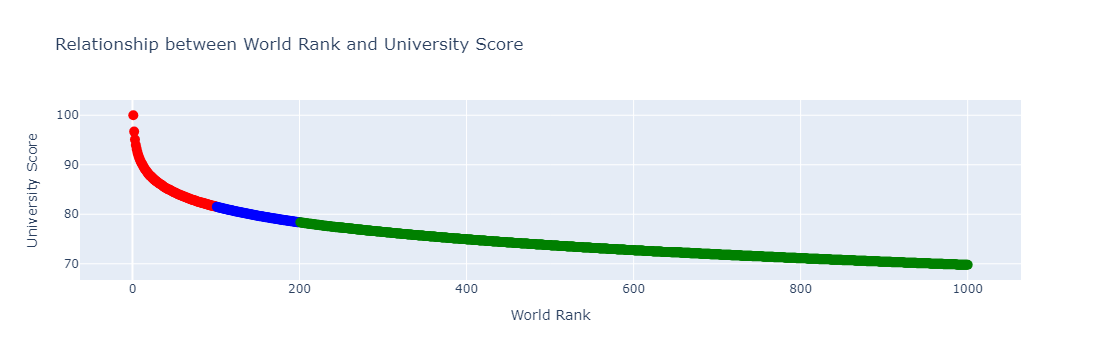

In [14]:
# Create a list of colors based on the university's world rank
colors = [
    "red" if rank <= 100 else "blue" if rank <= 200 else "green"
    for rank in DF['World Rank']
]

# Create the scatter plot using Plotly
fig = go.Figure(
    data=[
        go.Scatter(
            x=DF['World Rank'],
            y=DF['Score'],
            mode="markers",
            marker=dict(size=10, color=colors),
            name="University Score vs. World Rank",
        )
    ]
)

# Add title, axis labels, and other layout settings
fig.update_layout(
    title="Relationship between World Rank and University Score",
    xaxis_title="World Rank",
    yaxis_title="University Score",
)

# Show the chart
fig.show()


### Sunburst Plot
<div class ="alert alert-block alert-info">
Display the world ranking and scores of universities by country
</div>



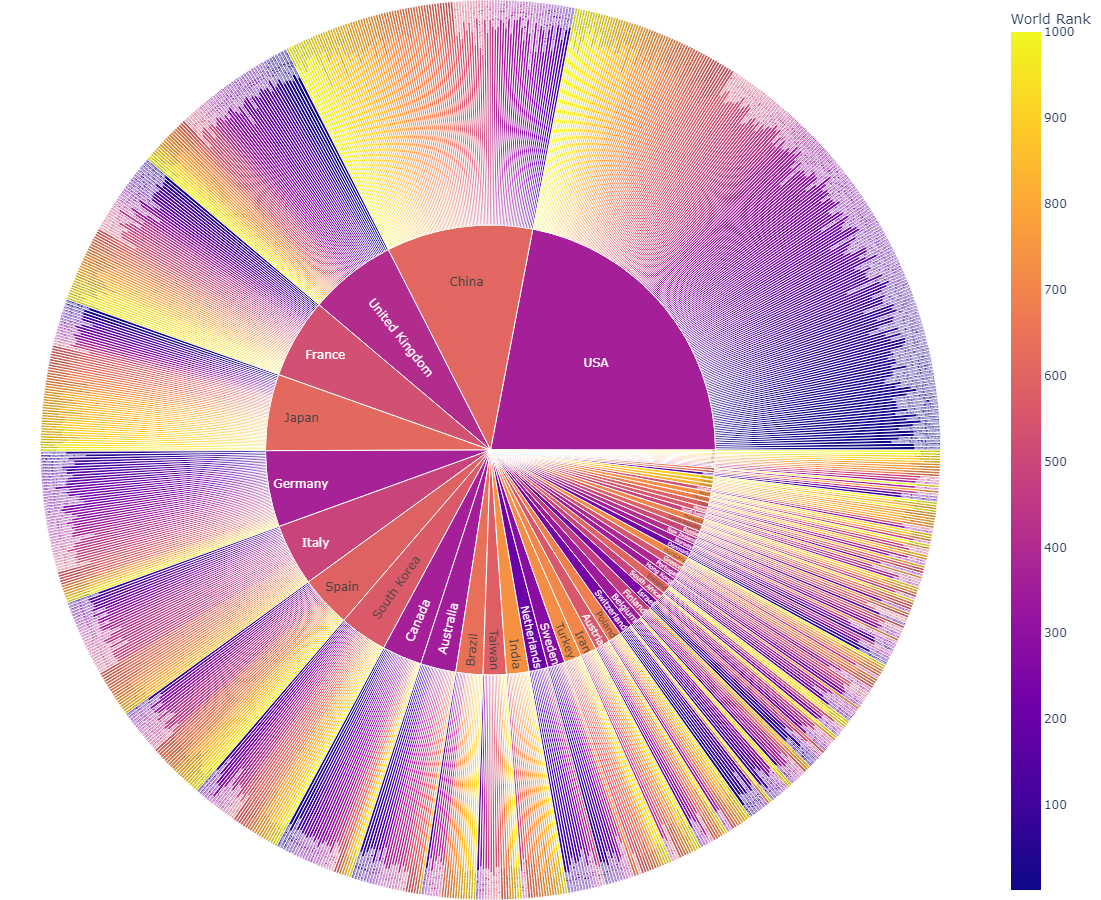

In [15]:
fig = px.sunburst(DF, path=['Location', 'Institution'], values='Score',
                  color='World Rank', hover_data=['Institution', 'World Rank'])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  width=1100, height=900)
fig.show()


### Comparison (1, 2, 3)
<div class ="alert alert-block alert-info">
Show a comparison of the global ranking and the local ranking of each university
</div>



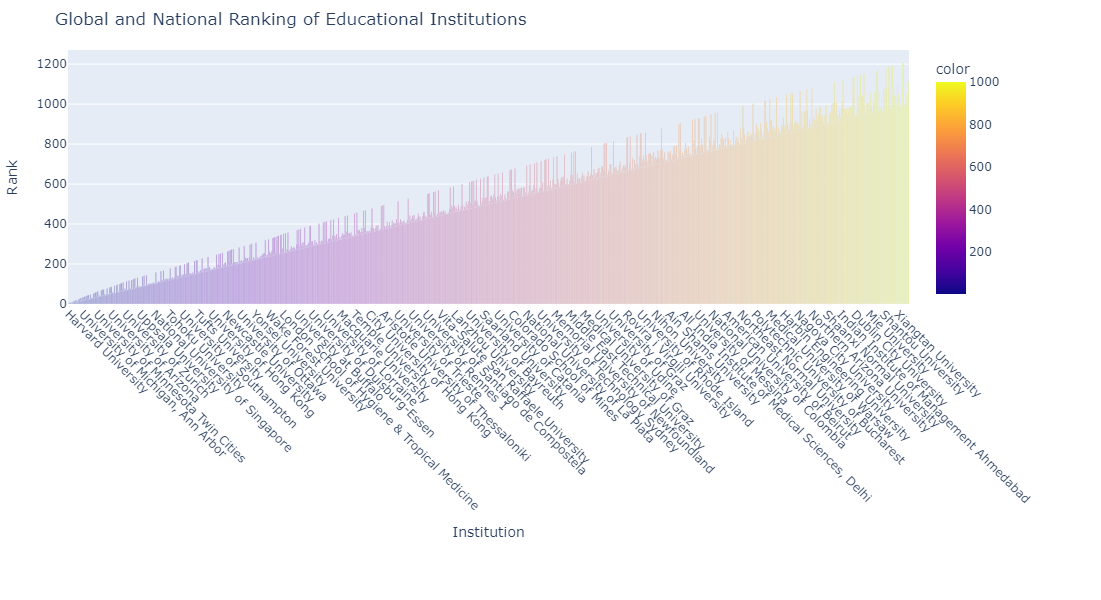

In [16]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'DF' and has the following columns:
# 'Institution', 'World Rank', 'National Rank', ...

fig = px.bar(
  DF,
  x="Institution",
  y=["World Rank", "National Rank"],
  color=DF[['World Rank', 'National Rank']].max(axis=1),  # Combine ranks into a single column
  barmode="group",
  title="Global and National Ranking of Educational Institutions",
  # Customize chart dimensions and appearance here (optional)
  width=1000,  # Example: Set chart width to 800 pixels
  height=600,  # Example: Set chart height to 600 pixels
  category_orders={"Institution": DF['Institution'].unique()}  # Optional: Set custom institution order
)
fig.update_layout(margin={'t': 50, 'b': 30, 'l': 40, 'r': 20})
# Customize axis labels and appearance (optional)
fig.update_xaxes(title="Institution", tickangle=45)  # Rotate x-axis labels for readability
fig.update_yaxes(title="Rank")

fig.show()


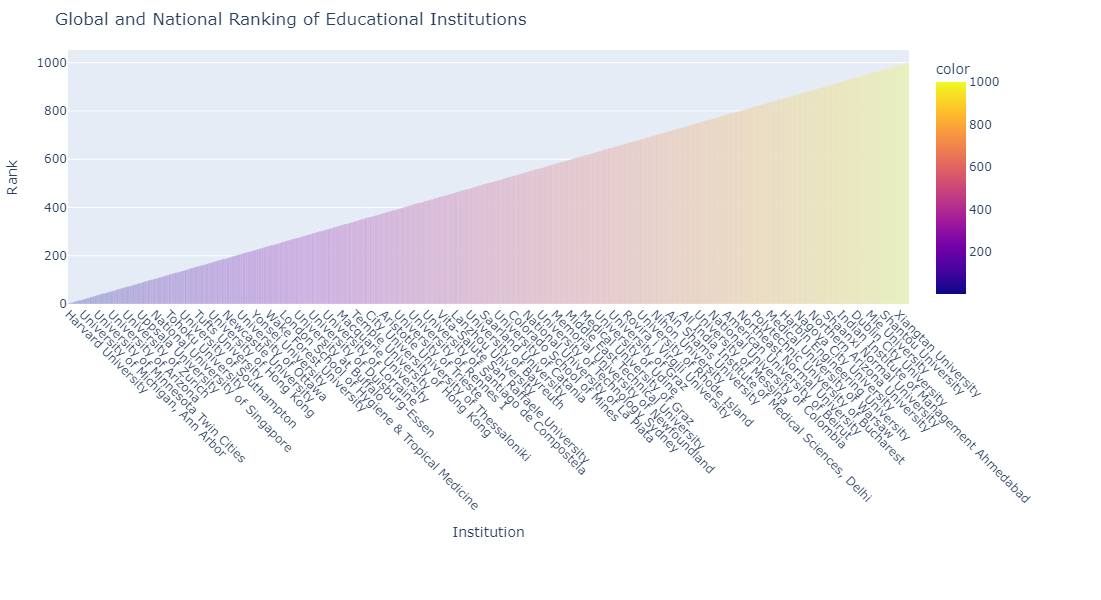

In [17]:
fig = px.bar(
    DF,
    x="Institution",
    y=["World Rank"],
    color=DF[['World Rank']].max(axis=1),  # Combine ranks into a single column
    barmode="group",
    title="Global and National Ranking of Educational Institutions",
    # Customize chart dimensions and appearance here (optional)
    width=1000,  #  Set chart width to 1000 pixels
    height=600,  #  Set chart height to 600 pixels
    category_orders={"Institution": DF['Institution'].unique()}  # Optional: Set custom institution order
)
fig.update_layout(margin={'t': 50, 'b': 30, 'l': 40, 'r': 20})
# Customize axis labels and appearance (optional)
fig.update_xaxes(title="Institution", tickangle=45)  # Rotate x-axis labels for readability
fig.update_yaxes(title="Rank")

fig.show()


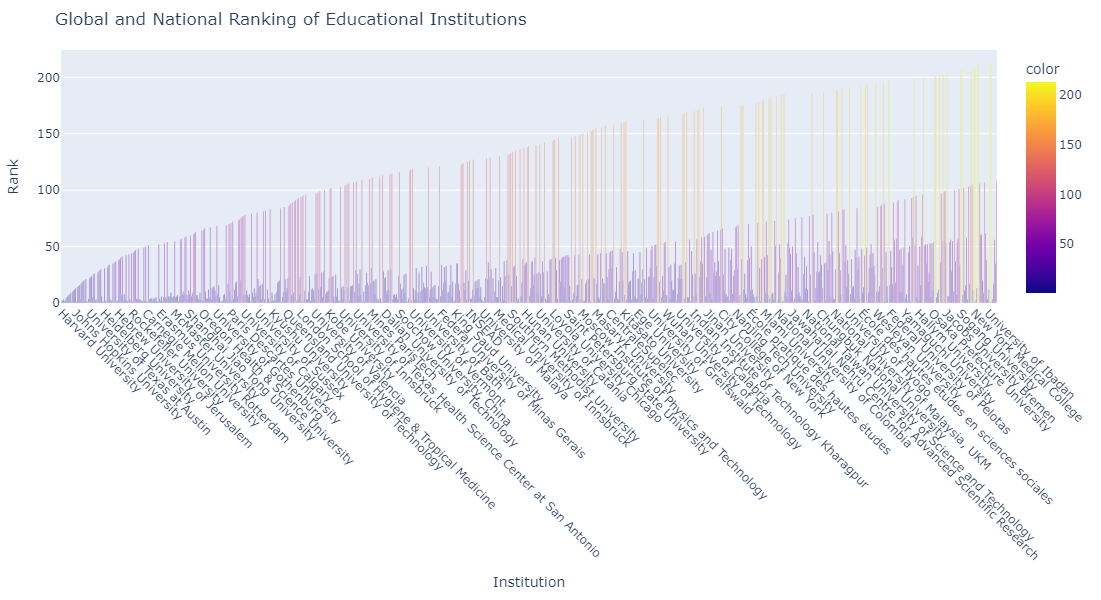

In [18]:

fig = px.bar(
    DF,
    x="Institution",
    y=["National Rank"],
 #   color=colors,
    color=DF[['National Rank']].max(axis=1),  # Combine ranks into a single column
    barmode="group",
    title="Global and National Ranking of Educational Institutions",
    # Customize chart dimensions and appearance here (optional)
    width=1000,  # Example: Set chart width to 800 pixels
    height=600,  # Example: Set chart height to 600 pixels
    category_orders={"Institution": DF['Institution'].unique()}  # Optional: Set custom institution order
)
fig.update_layout(margin={'t': 50, 'b': 30, 'l': 40, 'r': 20})
# Customize axis labels and appearance (optional)
fig.update_xaxes(title="Institution", tickangle=45)  # Rotate x-axis labels for readability
fig.update_yaxes(title="Rank")

fig.show()

### Comparing the number of researches and their quality
<div class ="alert alert-block alert-info">

Comparing the number of research outputs and their quality
(You can zoom in and scroll for a clearer view)</div>



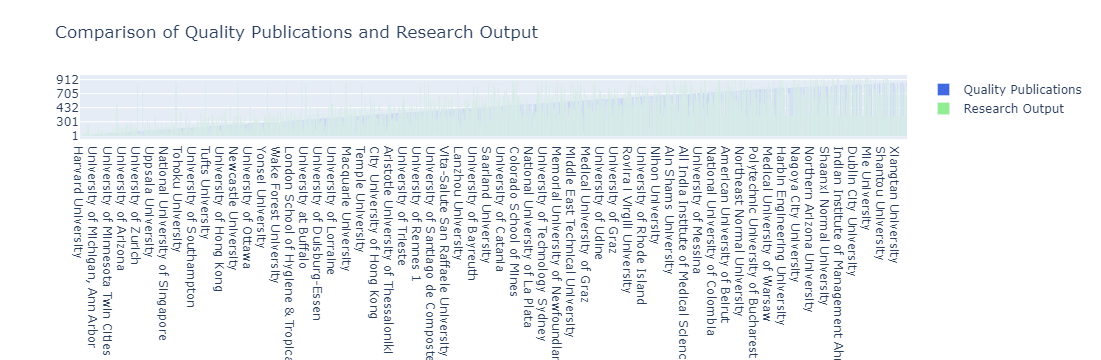

In [19]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(
    x=DF['Institution'],  # Use column names as x-axis categories
    y=DF['Quality Publications'],
    name='Quality Publications',
    marker_color='royalblue'
))



fig.add_trace(go.Bar(
    x=DF['Institution'],
    y=DF['Research Output'],
    name='Research Output',
    marker_color='lightgreen'
))

# Customize title (optional)
fig.update_layout(title="Comparison of Quality Publications and Research Output")

fig.show()


### Ranking 
<div class ="alert alert-block alert-info">

Distribution of global ranking of universities by country</div>



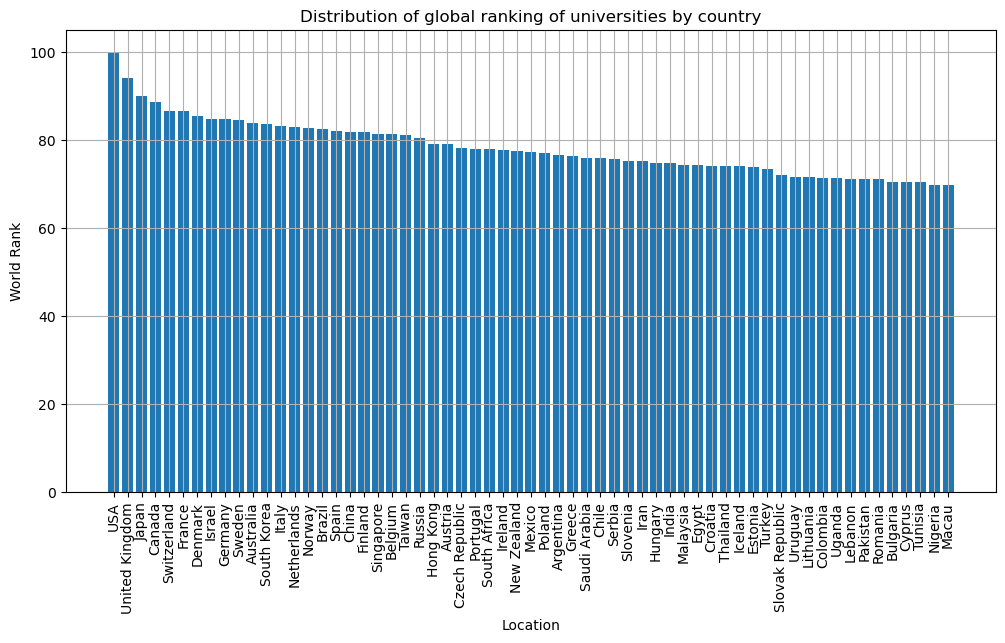

In [20]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(DF['Location'], DF['Score'])

# Add axis labels
plt.xlabel("Location")
plt.ylabel("World Rank")

# Add chart title
plt.title("Distribution of global ranking of universities by country")

# Display values on top of bars
#plt.bar_label(plt.gca().containers[0])

# Add grid lines
plt.grid(True)

# Rotate x-ticks (optional)
plt.xticks(rotation=90)

# Show the chart
plt.show()


### Exploring University Rankings by Location
<div class ="alert alert-block alert-info">

This code snippet utilizes Plotly Express (px) to create two scatter plots that explore the relationship between a university's location and key ranking criteria.

The first plot investigates the association between "Location" and "Quality of Education" score, with the title "World Rank vs. Quality of Education Score".

The second plot examines the connection between "Location" and "Research Output", titled "Location vs. Research Output".
<img src="https://www.timeshighereducation.com/student/sites/default/files/styles/default/public/2021-09/harvard-university-campus.jpg?itok=SK_1MUqi" alt="توضیحات تصویر">
</div>



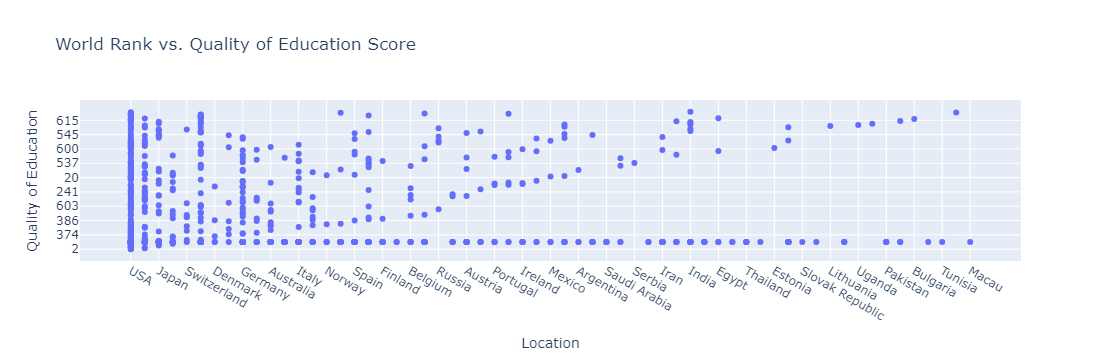

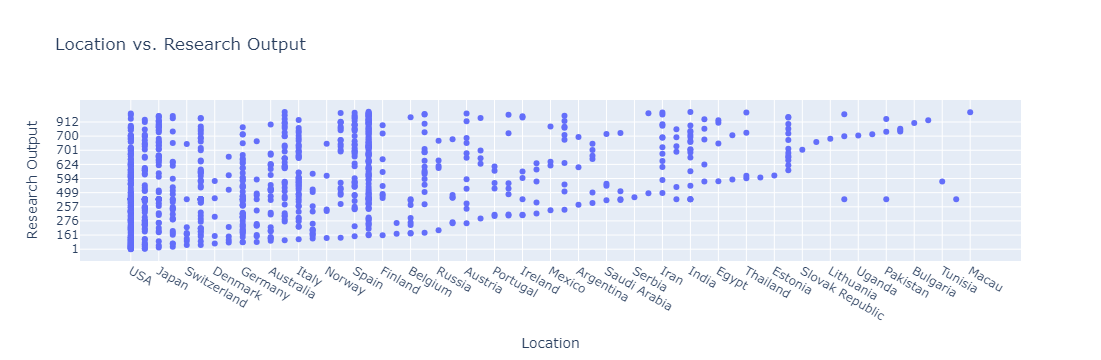

In [21]:
fig = px.scatter(DF, x="Location", y="Quality of Education", title="World Rank vs. Quality of Education Score")
fig.show()

# Investigate the relationship between two criteria
fig = px.scatter(DF, x="Location", y="Research Output", title="Location vs. Research Output")
fig.show()

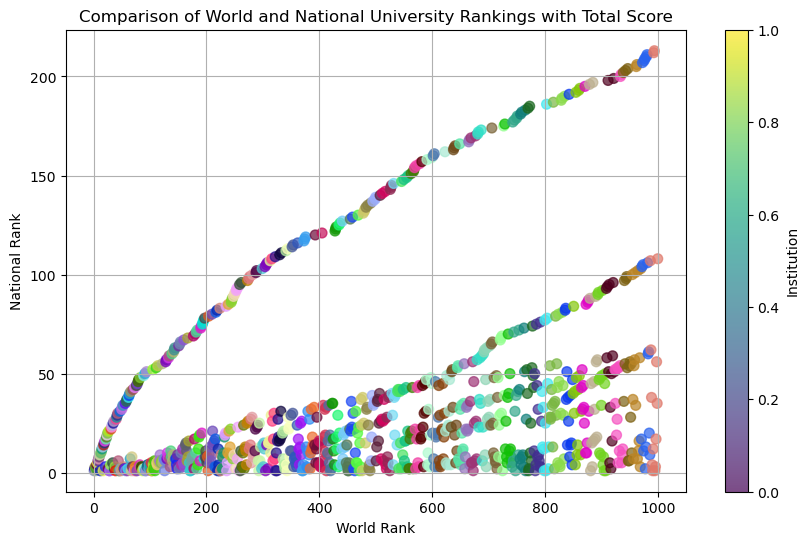

In [22]:
# Create a list of random HTML color codes
color_codes = ["#"+''.join(random.choice('0123456789ABCDEF') for i in range(6)) for _ in range(1000)]

# Create a dictionary `country_colors` to store random colors for each country
country_colors = {}
for i, country in enumerate(DF['Score']):
    country_colors[country] = color_codes[i]

# ... Rest of the bubble chart code ...

# Load data from CSV file
university_colors = [country_colors[country] for country in DF['Score']]

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    y=DF['National Rank'],
    x=DF['World Rank'],
    s=50,  # Use 'Total Score' for bubble size
    c=university_colors,  # Use 'Country' for bubble color
    alpha=0.7,
)

# Add axis labels
plt.xlabel("World Rank")
plt.ylabel("National Rank")

# Add chart title
plt.title("Comparison of World and National University Rankings with Total Score")

# Add colorbar
plt.colorbar(label="Institution")

# Add grid lines
plt.grid(True)

# Show the chart
plt.show()


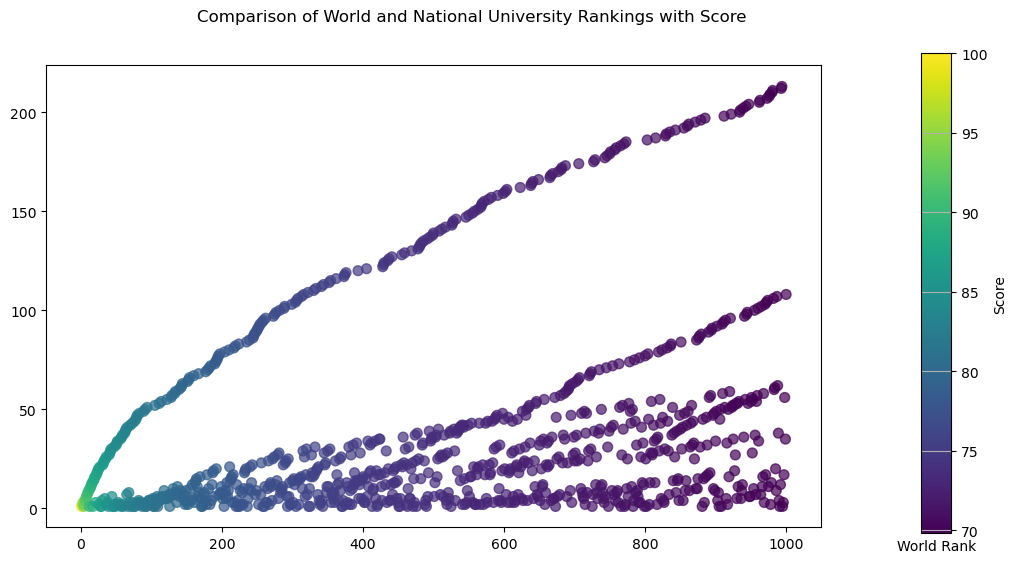

In [23]:
import matplotlib.cm as cm  # Import colormap library

# Create a list of random HTML color codes (optional, can be removed if not needed)
color_codes = ["#"+''.join(random.choice('0123456789ABCDEF') for i in range(6)) for _ in range(1000)]

# Create a dictionary `country_colors` to store colors based on score
country_colors = {}
norm = plt.Normalize(DF['Score'].min(), DF['Score'].max())  # Normalize score values

for i, country in enumerate(DF['Score']):
    score = DF.loc[i, 'Score']  # Access score data
    color = cm.ScalarMappable(cmap='viridis', norm=norm).to_rgba(score)  # Map score to color using viridis colormap
    country_colors[country] = color

# ... Rest of the bubble chart code ...

# Load data from CSV file
university_colors = [country_colors[country] for country in DF['Score']]

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    y=DF['National Rank'],
    x=DF['World Rank'],
    s=50,  # Adjust bubble size as needed
    c=university_colors,  # Use color mapping from country_colors
    alpha=0.7,
)
cax = plt.axes([1, 0.1, 0.03, 0.8])  # Adjust position as needed

# Add axis labels
plt.xlabel("World Rank")
plt.ylabel("National Rank")

# Add chart title
plt.title("Comparison of World and National University Rankings with Score", x=-15, y=1.05)

# Add colorbar with label based on score column
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
#plt.colorbar(sm, label="Score")
plt.colorbar(sm, cax=cax, label="Score")

# Add grid lines
plt.grid(True)

# Show the chart
plt.show()
